<a href="https://colab.research.google.com/github/AlexFraisl/Crop-Disease-Model-HSLU/blob/main/Crop_Notebook_discussion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import cv2


# GitHub repository URL
github_repo_url = "https://github.com/AlexFraisl/Crop-Disease-Model-HSLU.git"

# Delete folder
!rm -rf /content/image_data_Brownspot2

local_data_dir = "/content/image_data_Brownspot2"

# Clone the repository
!git clone {github_repo_url} {local_data_dir}

# Define training and validation paths after cloning
training_folder = os.path.join(local_data_dir, "Dataset/archive/Train/Brownspot")
validation_folder = os.path.join(local_data_dir, "Dataset/archive/Validation/Brownspot")

def analyze_image_dataset(folder_path):
    image_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add other image extensions if needed
            filepath = os.path.join(folder_path, filename)
            try:
                image = Image.open(filepath)
                width, height = image.size
                image_data.append({
                    "filename": filename,
                    "width": width,
                    "height": height,
                    "format": image.format
                })
            except IOError:
                print(f"Error opening {filename}")

    return pd.DataFrame(image_data)

# Check if training and validation folders exist
if os.path.exists(training_folder):
    # Analyze the training set
    training_df = analyze_image_dataset(training_folder)
    print("Training Set Analysis:")
    print(training_df.describe())
    print(training_df.info())
else:
    print("Training folder not found!")

if os.path.exists(validation_folder):
    # Analyze the validation set
    validation_df = analyze_image_dataset(validation_folder)
    print("\nValidation Set Analysis:")
    print(validation_df.describe())
    print(validation_df.info())
else:
    print("Validation folder not found!")


Cloning into '/content/image_data_Brownspot2'...
remote: Enumerating objects: 15326, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15326 (delta 3), reused 7 (delta 0), pack-reused 15310 (from 1)
Receiving objects: 100% (15326/15326), 1.94 GiB | 32.49 MiB/s, done.
Resolving deltas: 100% (53/53), done.
Updating files: 100% (18629/18629), done.
Training Set Analysis:
             width       height
count  1623.000000  1623.000000
mean    311.567468   300.873691
std     151.205759    36.280411
min     286.000000    88.000000
25%     300.000000   300.000000
50%     300.000000   300.000000
75%     300.000000   300.000000
max    3081.000000   900.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1623 non-null   object
 1   width     1623 non-null   int64 
 2   height    162

In [5]:
    print("Training Set Analysis:")
    print(training_df.describe())
    print(training_df.info())

Training Set Analysis:
             width       height
count  1623.000000  1623.000000
mean    311.567468   300.873691
std     151.205759    36.280411
min     286.000000    88.000000
25%     300.000000   300.000000
50%     300.000000   300.000000
75%     300.000000   300.000000
max    3081.000000   900.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1623 non-null   object
 1   width     1623 non-null   int64 
 2   height    1623 non-null   int64 
 3   format    1623 non-null   object
dtypes: int64(2), object(2)
memory usage: 50.8+ KB
None


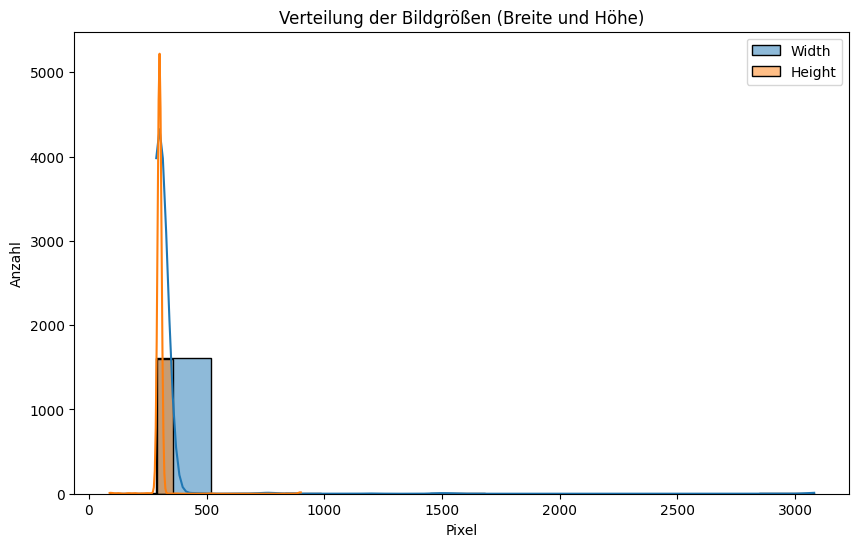

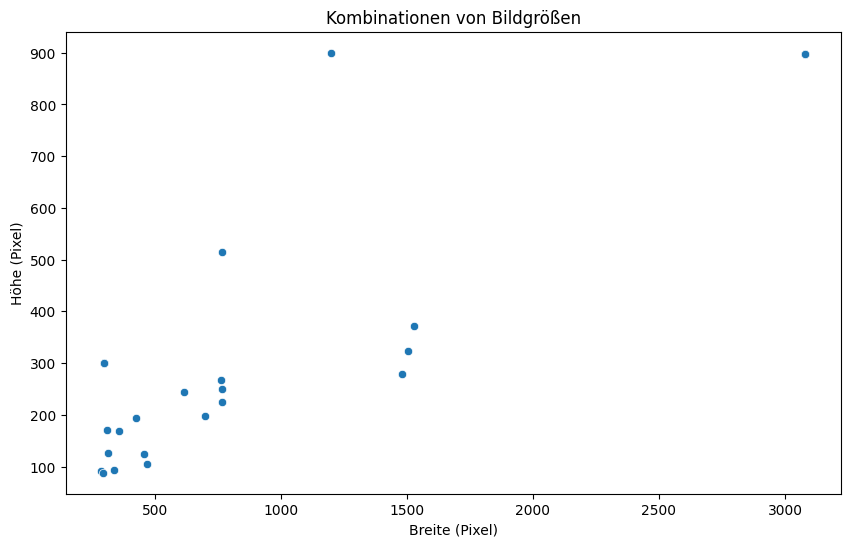


Frequenz der eindeutigen Bildgrößen:
    width  height  count
0     286      92      1
1     296      88      1
2     300     300   1600
3     311     170      1
4     316     127      1
5     340      94      1
6     359     168      1
7     427     193      1
8     456     124      1
9     467     104      1
10    617     244      1
11    699     197      1
12    763     268      1
13    765     224      1
14    766     250      1
15    768     514      1
16   1200     900      1
17   1480     279      1
18   1504     323      1
19   1530     371      1
20   3081     897      4


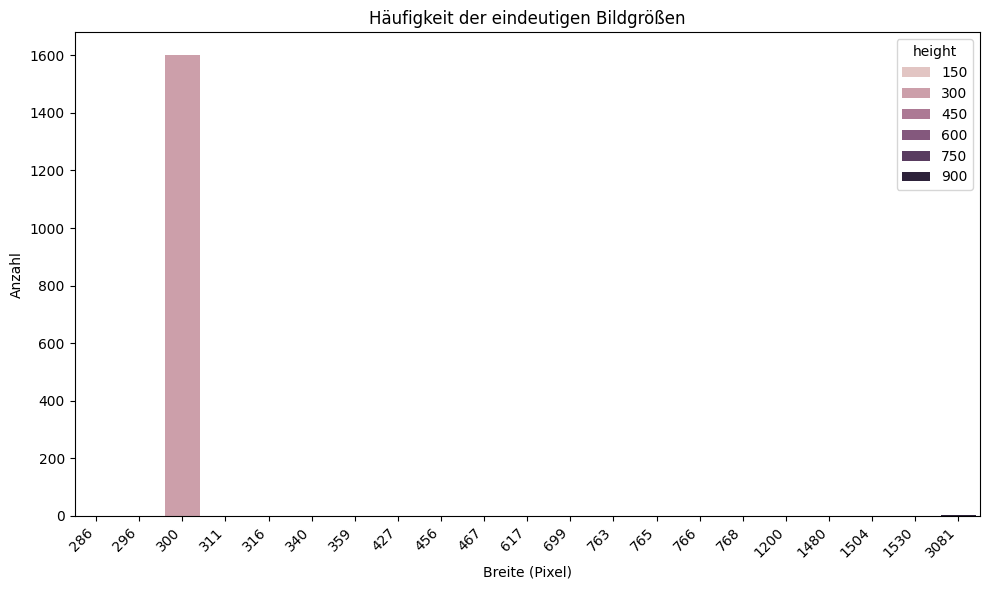

In [6]:
# prompt: visualisiere das trainings set. Um herauszufinden welche images größe wie oft vorhanden ist

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming training_df is already created from the previous code

# Visualize image sizes
plt.figure(figsize=(10, 6))
sns.histplot(training_df['width'], kde=True, label='Width')
sns.histplot(training_df['height'], kde=True, label='Height')
plt.xlabel('Pixel')
plt.ylabel('Anzahl')
plt.title('Verteilung der Bildgrößen (Breite und Höhe)')
plt.legend()
plt.show()


# Visualize image size combinations as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='width', y='height', data=training_df)
plt.xlabel('Breite (Pixel)')
plt.ylabel('Höhe (Pixel)')
plt.title('Kombinationen von Bildgrößen')
plt.show()

# Frequency of unique image sizes
size_counts = training_df.groupby(['width', 'height']).size().reset_index(name='count')
print("\nFrequenz der eindeutigen Bildgrößen:")
print(size_counts)

#Visualize the frequency of unique image sizes
plt.figure(figsize=(10, 6))
sns.barplot(x='width', y='count', hue='height', data=size_counts)
plt.xlabel('Breite (Pixel)')
plt.ylabel('Anzahl')
plt.title('Häufigkeit der eindeutigen Bildgrößen')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [7]:
# prompt: Liste eine Übersicht des training Datasets auf

# Assuming training_df is already created from the previous code

print("Training Set Overview:")
print(training_df.head()) # Display first few rows
print("\nSummary Statistics:")
print(training_df.describe()) # Summary statistics
print("\nData Types:")
print(training_df.info()) # Data types and non-null values
print("\nShape of the DataFrame:")
print(training_df.shape) # Number of rows and columns

Training Set Overview:
             filename  width  height format
0  BROWNSPOT7_003.jpg    300     300   JPEG
1  BROWNSPOT4_158.jpg    300     300   JPEG
2  BROWNSPOT7_043.jpg    300     300   JPEG
3  BROWNSPOT6_158.jpg    300     300   JPEG
4  BROWNSPOT1_053.jpg    300     300   JPEG

Summary Statistics:
             width       height
count  1623.000000  1623.000000
mean    311.567468   300.873691
std     151.205759    36.280411
min     286.000000    88.000000
25%     300.000000   300.000000
50%     300.000000   300.000000
75%     300.000000   300.000000
max    3081.000000   900.000000

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1623 non-null   object
 1   width     1623 non-null   int64 
 2   height    1623 non-null   int64 
 3   format    1623 non-null   object
dtypes: int64(2), object(2)
memory usage: 50.8+ KB
None



In [8]:
# prompt: zeige mir die unterschiedlichen Dateitypen des training data an

# ... (Your existing code)

# Assuming training_df is already created from the previous code

# Display unique image formats and their counts
format_counts = training_df['format'].value_counts()
print("\nUnique Image Formats and their Counts:")
format_counts


Unique Image Formats and their Counts:


,count
format,
JPEG,1559
PNG,64


In [9]:
# prompt: what is the average image size of the training data set

# Calculate the average image width and height
average_width = training_df['width'].mean()
average_height = training_df['height'].mean()

print(f"\nAverage Image Width: {average_width:.2f} pixels")
print(f"Average Image Height: {average_height:.2f} pixels")


Average Image Width: 311.57 pixels
Average Image Height: 300.87 pixels


In [10]:
# prompt: liste die anzahl aller images auf vom training dataset die nicht 300x300

# Count images in the training dataset that are not 300x300
non_300x300_count = len(training_df[(training_df['width'] != 300) | (training_df['height'] != 300)])
print(f"\nNumber of images in the training dataset that are not 300x300: {non_300x300_count}")


Number of images in the training dataset that are not 300x300: 23


In [11]:
# prompt: liste die anzahl aller images auf vom training dataset die 300x300

# Count images in the training dataset that are 300x300
count_300x300 = len(training_df[(training_df['width'] == 300) & (training_df['height'] == 300)])
print(f"\nNumber of images in the training dataset that are 300x300: {count_300x300}")


Number of images in the training dataset that are 300x300: 1600


In [12]:
training_df = count_300x300

          filename  brown_spots
46    DSC_0113.jpg           33
1139  DSC_0121.jpg           30
1236  DSC_0101.jpg           22
1111  DSC_0105.jpg           21
1349  DSC_0106.jpg           21


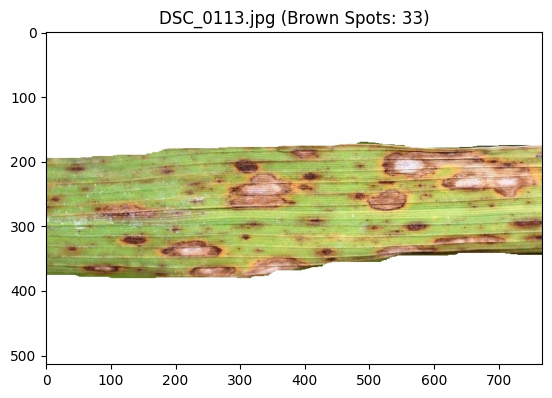

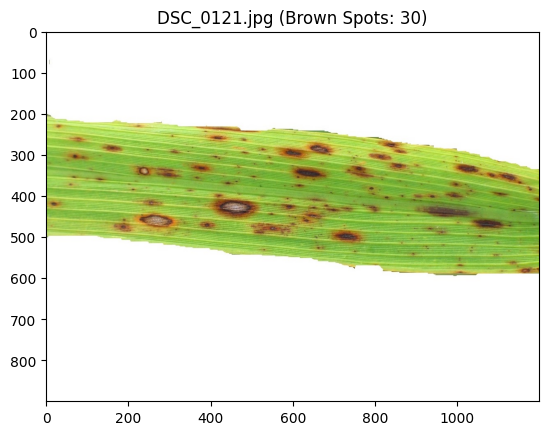

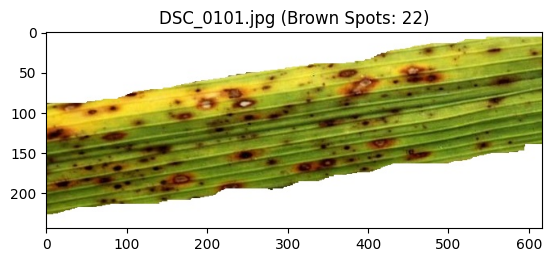

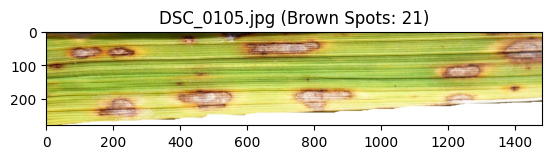

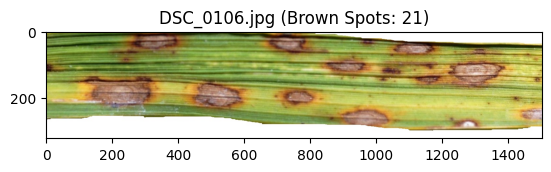

In [24]:
# prompt: Kannst du die top 5 bilder anzeigen mit den meisten brown spots die mindestens 10x10 pixel haben?

import pandas as pd
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# ... (Your existing code)

def count_brown_spots(image_path, min_size=10):
    try:
        img = cv2.imread(image_path)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Define brown color range in HSV
        lower_brown = np.array([10, 100, 20])
        upper_brown = np.array([20, 255, 200])

        mask = cv2.inRange(img_hsv, lower_brown, upper_brown)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        brown_spot_count = 0
        for contour in contours:
            area = cv2.contourArea(contour)
            if area >= min_size * min_size:  # Check if spot is larger than min_size x min_size pixels
                brown_spot_count += 1
        return brown_spot_count
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return 0

image_data = []
for filename in os.listdir(training_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        filepath = os.path.join(training_folder, filename)
        brown_spots = count_brown_spots(filepath)
        image_data.append({
            "filename": filename,
            "brown_spots": brown_spots
        })

df = pd.DataFrame(image_data)
top_5_images = df.nlargest(5, 'brown_spots')

print(top_5_images)

for index, row in top_5_images.iterrows():
    image_path = os.path.join(training_folder, row['filename'])
    try:
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"{row['filename']} (Brown Spots: {row['brown_spots']})")
        plt.show()
    except Exception as e:
        print(f"Error displaying image {image_path}: {e}")


Summary statistics of brown spots:
        brown_spots
count   1623.000000
mean     707.417129
std     2159.886576
min        0.000000
25%       47.500000
50%      279.000000
75%      635.000000
max    52860.000000


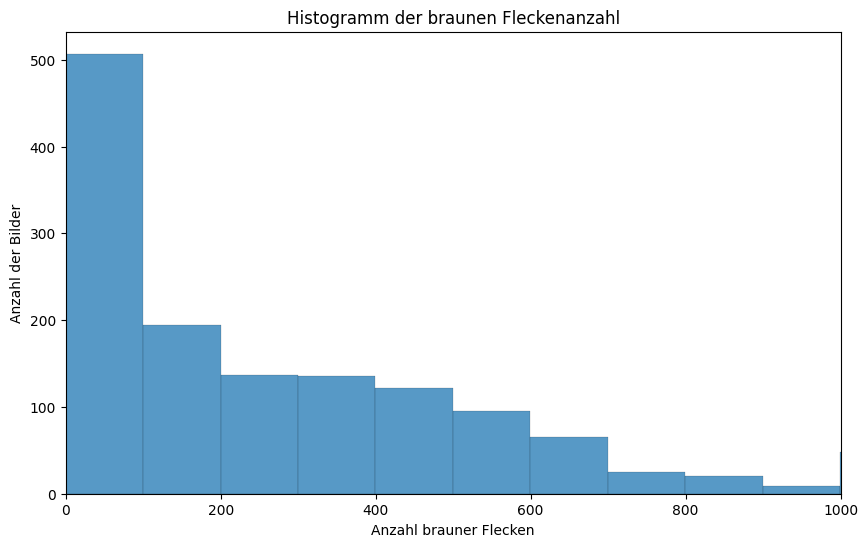


Further analysis on brown spots:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     1623 non-null   object
 1   brown_spots  1623 non-null   int64 
 2   Status       1623 non-null   object
dtypes: int64(1), object(2)
memory usage: 38.2+ KB
None

Images with more than 5000 brown spots:
          filename  brown_spots    Status
46    DSC_0113.jpg        18572  Diseased
335   DSC_0329.jpg        28389  Diseased
631   DSC_0391.jpg         5271  Diseased
712   DSC_0104.jpg        37570  Diseased
744   DSC_0100.jpg         7644  Diseased
1111  DSC_0105.jpg        28940  Diseased
1139  DSC_0121.jpg        19820  Diseased
1236  DSC_0101.jpg         7377  Diseased
1349  DSC_0106.jpg        52860  Diseased

Average number of brown spots per image: 707.42

Median number of brown spots per image: 279.00


In [25]:
# prompt: Gib mir bitte infos über die brown_spots

# Assuming brown_spots_df is already created from the previous code

print("\nSummary statistics of brown spots:")
print(brown_spots_df.describe())

# Histogram of brown spot counts
plt.figure(figsize=(10, 6))
sns.histplot(brown_spots_df['brown_spots'])  # Increase the number of bins
plt.xlim(0, 1000)
plt.xlabel('Anzahl brauner Flecken')
plt.ylabel('Anzahl der Bilder')
plt.title('Histogramm der braunen Fleckenanzahl')
plt.show()

# Further analysis on brown_spots_df
print("\nFurther analysis on brown spots:")
print(brown_spots_df.info())

# Example: Find images with more than a certain threshold of brown spots
threshold = 5000  # Example threshold
images_above_threshold = brown_spots_df[brown_spots_df['brown_spots'] > threshold]
print(f"\nImages with more than {threshold} brown spots:")
print(images_above_threshold)


# Calculate the average number of brown spots
average_brown_spots = brown_spots_df['brown_spots'].mean()
print(f"\nAverage number of brown spots per image: {average_brown_spots:.2f}")

# Calculate the median number of brown spots
median_brown_spots = brown_spots_df['brown_spots'].median()
print(f"\nMedian number of brown spots per image: {median_brown_spots:.2f}")



In [22]:
# prompt: Gib mir eine Liste mit details der Kranken und gesunden blätter

# Assuming brown_spots_df is already created from the previous code

# Healthy leaves analysis
healthy_threshold = 100  # Example threshold for healthy leaves (adjust as needed)
healthy_leaves = brown_spots_df[brown_spots_df['brown_spots'] <= healthy_threshold]
print(f"\nImages considered healthy (brown spots <= {healthy_threshold}):")
print(healthy_leaves)

# Sick leaves analysis
sick_leaves = brown_spots_df[brown_spots_df['brown_spots'] > healthy_threshold]
print(f"\nImages considered sick (brown spots > {healthy_threshold}):")
print(sick_leaves)


#Further analysis on healthy and sick leaves
print("\nFurther analysis on healthy leaves:")
print(healthy_leaves.describe())

print("\nFurther analysis on sick leaves:")
print(sick_leaves.describe())


Images considered healthy (brown spots <= 100):
                filename  brown_spots   Status
0     BROWNSPOT7_003.jpg            0  Healthy
2     BROWNSPOT7_043.jpg            0  Healthy
4     BROWNSPOT1_053.jpg           72  Healthy
7     BROWNSPOT2_101.jpg            0  Healthy
8     BROWNSPOT7_103.jpg            0  Healthy
...                  ...          ...      ...
1596  BROWNSPOT2_006.jpg            0  Healthy
1598  BROWNSPOT5_044.jpg           70  Healthy
1599  BROWNSPOT5_101.jpg            0  Healthy
1610  BROWNSPOT4_182.jpg            0  Healthy
1614  BROWNSPOT7_005.jpg            0  Healthy

[507 rows x 3 columns]

Images considered sick (brown spots > 100):
                filename  brown_spots   Status
1     BROWNSPOT4_158.jpg          286  Healthy
3     BROWNSPOT6_158.jpg          289  Healthy
5     BROWNSPOT7_148.jpg          244  Healthy
6     BROWNSPOT3_165.jpg          344  Healthy
9     BROWNSPOT7_040.jpg         1046  Healthy
...                  ...          ..


Top 5 images with the most brown spots (grayscale):
          filename  brown_spots    Status
1349  DSC_0106.jpg        52860  Diseased
712   DSC_0104.jpg        37570  Diseased
1111  DSC_0105.jpg        28940  Diseased
335   DSC_0329.jpg        28389  Diseased
1139  DSC_0121.jpg        19820  Diseased


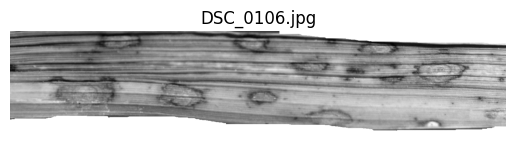

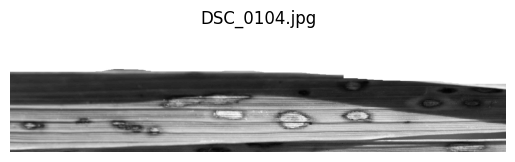

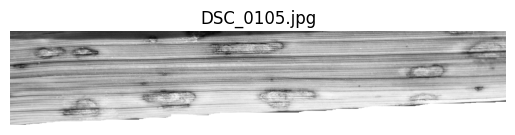

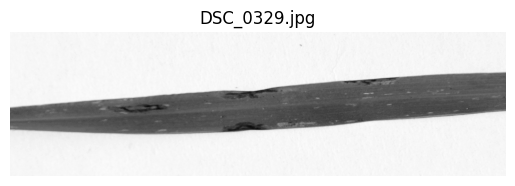

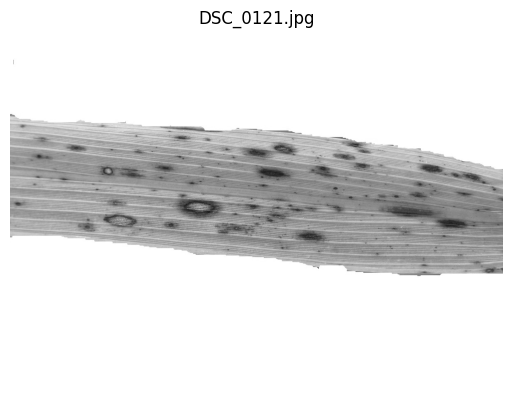

In [23]:
# prompt: Show us the top 5 images with the highest brown spot score in grey tone

# Assuming brown_spots_df is already created from the previous code

def display_grayscale_image(image_path):
    """Displays the image in grayscale."""
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        plt.figure()
        plt.imshow(img, cmap='gray')  # Display with gray colormap
        plt.title(os.path.basename(image_path))
        plt.axis('off')  # Hide axes
        plt.show()
    except Exception as e:
        print(f"Error displaying {image_path}: {e}")

# Sort the DataFrame by brown_spots count in descending order
top_5_images = brown_spots_df.sort_values(by="brown_spots", ascending=False).head(5)

print("\nTop 5 images with the most brown spots (grayscale):")
print(top_5_images)

# Display the top 5 images in grayscale
for index, row in top_5_images.iterrows():
    image_path = os.path.join(training_folder, row["filename"])
    display_grayscale_image(image_path)


Classification Analysis:
classification
Mildly Infected        593
Healthy                507
Moderately Infected    373
Severely Infected      150
Name: count, dtype: int64


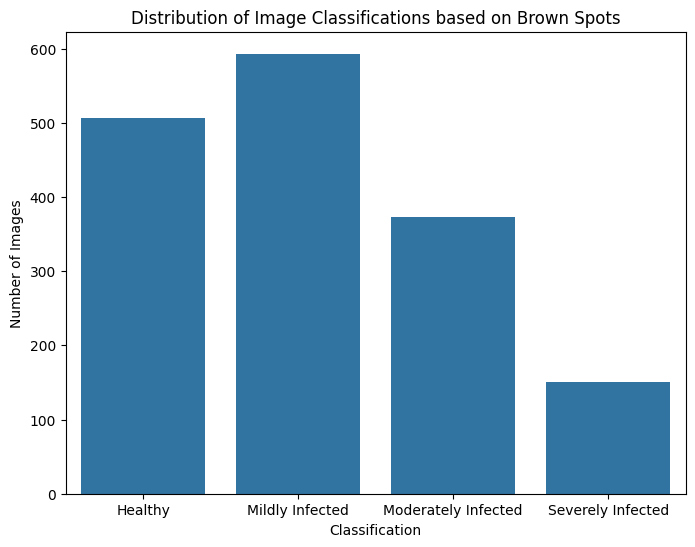


Further analysis on classifications:


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Healthy,507.0,18.852071,29.098847,0.0,0.0,0.0,35.0,98.0
Mildly Infected,593.0,287.087690,116.432554,104.0,181.0,276.0,385.0,500.0
Moderately Infected,373.0,959.412869,411.049857,502.0,607.0,827.0,1230.0,1997.0
Severely Infected,150.0,4069.840000,6037.234695,2002.0,2545.0,2712.0,3377.0,52860.0


In [26]:
# prompt: Wie kann ich die Form der Braunen Punkte analysieren und klassifizieren?

import pandas as pd
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code)


# Assuming brown_spots_df is already created from the previous code

# Example classification based on brown spot count (you can adjust the thresholds)
def classify_brown_spots(brown_spot_count):
    if brown_spot_count <= 100:  # Example threshold, adjust as needed
        return "Healthy"
    elif brown_spot_count <= 500:
        return "Mildly Infected"
    elif brown_spot_count <= 2000:
        return "Moderately Infected"
    else:
        return "Severely Infected"

brown_spots_df['classification'] = brown_spots_df['brown_spots'].apply(classify_brown_spots)

# Analyze the classification
print("\nClassification Analysis:")
print(brown_spots_df['classification'].value_counts())


# Visualize the classification
plt.figure(figsize=(8, 6))
sns.countplot(x='classification', data=brown_spots_df)
plt.xlabel('Classification')
plt.ylabel('Number of Images')
plt.title('Distribution of Image Classifications based on Brown Spots')
plt.show()

#Further analysis based on classification
print("\nFurther analysis on classifications:")

# Group data by classification and get descriptive statistics
classification_stats = brown_spots_df.groupby('classification')['brown_spots'].describe()
classification_stats